# Kovarianz und Korrelation

Mit der Kovarianz kann gemessen werden, ob zwei statistische Zufallsvariablen einen linearen Zusammenhang haben.

Beispiel: Man arbeitet für einen Online-Shop, und man möchte eine Korrelation zwischen der Geschwindigkeit der Webseite (Ladezeit, etc.) und wie viel ein Kunde ausgibt feststellen.

numpy stellt hierfür fertige Methoden zur Verfügung, aber wir werden es erstmal "zu Fuß" berechnen, um das genauer untersuchen zu können. Wir fassen hierfür jede Variable als einen Vektor von Abweichungen vom Mittelwert auf, und berechen das "Kreuzprodukt" der beiden Vektoren. 

Geometrisch kann man sich das so vorstellen, als wenn wir den Winkel der beiden Vektoren zueinander in einem Hochdimensionalen Raum berechnen, aber man kann es sich auch einfach so vorstellen dass man die Ähnlichkeit der beiden Variablen berechnet. 

Zuerst, betrachten wir den Fall dass Geschwindigkeit und Kaufverhalten zufällig und komplett unabhängig voneinander sind. Das Ergebnis wird eine sehr kleine Kovarianz sein, es gibt also keine Korrelation zwischen den zwei Werten:

-0.10420418744662338

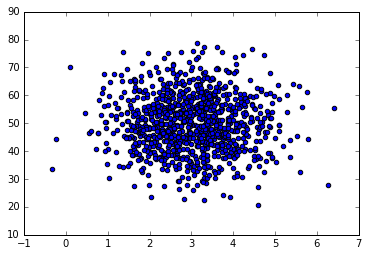

In [7]:
%matplotlib inline
import numpy as np
from pylab import *

def de_mean(x):
    xmean = mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)


-7.3097337082484781

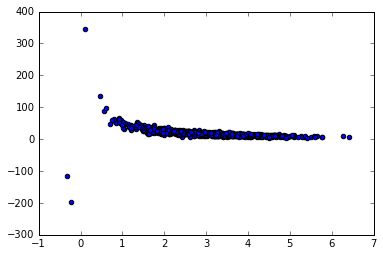

In [8]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

covariance (pageSpeeds, purchaseAmount)

Betrachten wir jetzt den Fall, dass sich das Kaufverhalten sehr wohl vom der Geschwindigkeit der Webseite beeinflussen lässt. Der negative Wert deutet auf einen umgedrehten Zusammenhang hin, auf Seiten die weniger Zeit benötigten gibt ein Kunde im Durchschnitt mehr aus:

Aber was bedeutet das Ergebnis? Kovarianz ist abhängig von den Variablen sowie den Einheiten die wir verwenden. Das macht es schwer, das Ergebnis zu interpretieren.

Korrelation normalisiert dies mit Hilfe der Standardabweichungen der beiden Zufallsvariablen. Dadurch wird der Bereich einfacher zu interpretieren: -1 für eine perfekte, inverse Korrelation, 0 für keine Korrelation und 1 ür eine perfekte, positive Korrelation:

In [9]:
def correlation(x, y):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x,y) / stddevx / stddevy  #In real life you'd check for divide by zero here

correlation(pageSpeeds, purchaseAmount)

-0.44787450112926147

numpy kann uns hierbei unterstützen, mit Hilfe der Funktion numpy.corrcoef. Das Ergebnis ist eine Matrix mit den entsprechenden Korrelationskoeffizienten zwischen jedem übergebenen Parameter:

In [10]:
np.corrcoef(pageSpeeds, purchaseAmount)

array([[ 1.        , -0.44742663],
       [-0.44742663,  1.        ]])

(Das Ergebnis stimmt nicht zu 100% mit dem von uns ausgerechneten Ergebnis überein, das liegt an Rundungsfehlern die während den Berechnungen auftreten. Wir rechnen ja auf einem Computer.)

Man kann eine perfekte Korrelation erzwingen, indem man ein komplett lineare Beziehung zwischen den einzelnen Werten erzeugt. (Aufgrund von Rundungsfehlern ist das Ergebnis auch hier nicht genau -1, aber es ist nah genug an der -1, dass wir sehen, es gibt eine ziemlich eindeutige Korrelation zwischen den Werten)

-1.0010010010010013

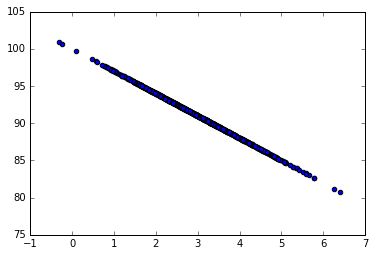

In [11]:
purchaseAmount = 100 - pageSpeeds * 3

scatter(pageSpeeds, purchaseAmount)

correlation (pageSpeeds, purchaseAmount)

Aber Achtung: Korrelation bedeutet nicht zwangsläufig Kausalität!

## Aufgabe

In numpy gibt es auch eine numpy.cov - Funktion, welche die Kovarianz berechnet. Versuche mit Hilfe dieser Funktion die Kovarianz der pageSpeeds und purchaseAmounts der obigen Daten zu berechnen. Interpretiere die Daten und vergleiche es mit den Ergebnissen unserer eigenen Kovarianz-Funktion!